In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('train.csv')
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=df.iloc[:,1:].values
y=df['label'].values
print(x.shape,y.shape)

(42000, 784) (42000,)


3


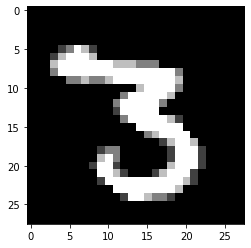

In [6]:
plt.imshow(x[13].reshape(28,28),cmap='gray')
print(y[13])

NormaliZation

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sd=StandardScaler().fit_transform(x)
sd

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
# taking only 10K  
X=sd[:10000,:]
Y=y[:10000]
X.shape,Y.shape

((10000, 784), (10000,))

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)

In [12]:
Z=pca.fit_transform(X)

In [13]:
Z.shape

(10000, 2)

In [14]:
Z

array([[-4.86852442, -5.40610002],
       [18.86769762,  7.14275433],
       [-7.48938033, -1.9312599 ],
       ...,
       [-1.56077817, -5.45875267],
       [ 2.22854173, 17.81682856],
       [-0.37970723,  9.71764858]])

In [15]:
pca.explained_variance_

array([41.19696918, 28.78505994])

In [22]:
pca.explained_variance_ratio_

array([0.05700785, 0.03983241])

PCA custom

In [16]:
# covariance matrix
cov=np.dot(X.T,X)
cov.shape

(784, 784)

In [17]:
from numpy.linalg import svd

In [18]:
# eigen vectors using SVD 
u,s,v=svd(cov)
u.shape

(784, 784)

In [19]:
U=u[:,:2]
U.shape

(784, 2)

In [20]:
Z1=np.dot(X,U)
print(Z1.shape)
Z1

(10000, 2)


array([[ -4.78980422,   5.46145463],
       [ 18.94016007,  -7.09918153],
       [ -7.41146944,   1.98753812],
       ...,
       [ -1.48257324,   5.50714417],
       [  2.29809662, -17.77356941],
       [ -0.30641366,  -9.66868043]])

In [23]:
import seaborn as sns

In [24]:
# adding new axis to data 
data=np.hstack((Z1,Y.reshape(-1,1)))
print(data.shape)
data

(10000, 3)


array([[ -4.78980422,   5.46145463,   1.        ],
       [ 18.94016007,  -7.09918153,   0.        ],
       [ -7.41146944,   1.98753812,   1.        ],
       ...,
       [ -1.48257324,   5.50714417,   4.        ],
       [  2.29809662, -17.77356941,   7.        ],
       [ -0.30641366,  -9.66868043,   9.        ]])

In [25]:
# cearting dataFame
dataFrame=pd.DataFrame(data,columns=['PC1','PC2','label'])
dataFrame.head()

,PC1,PC2,label
0,-4.789804,5.461455,1.0
1,18.940160,-7.099182,0.0
2,-7.411469,1.987538,1.0
3,-0.709503,-5.455526,4.0
4,26.400971,-7.661145,0.0


VisualiZation 

<Figure size 1080x1080 with 0 Axes>

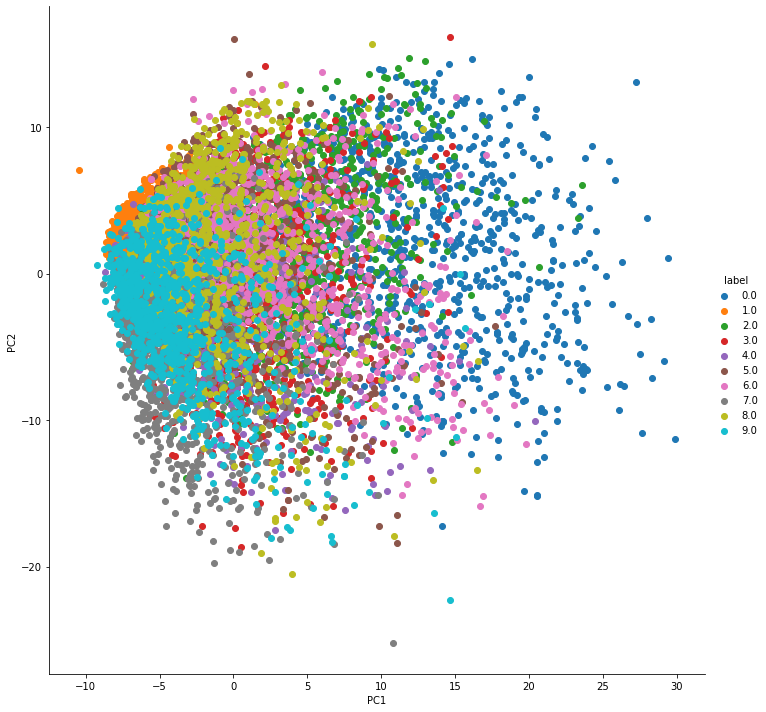

In [28]:
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataFrame, hue="label", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

In [36]:
pca=PCA()
Zpca=pca.fit_transform(X)
print(Zpca.shape)
Zpca

(10000, 784)


array([[-4.86855956e+00, -5.40595814e+00,  4.12960401e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 1.88677205e+01,  7.14210179e+00,  4.64935898e-01, ...,
        -1.04570265e-15,  5.23420236e-17,  2.33864313e-16],
       [-7.48938253e+00, -1.93124046e+00,  2.49697193e+00, ...,
         1.07987949e-15, -6.39213476e-16,  1.00431873e-16],
       ...,
       [-1.56076774e+00, -5.45854302e+00, -5.33285228e+00, ...,
        -2.03456040e-16, -3.05423520e-16, -5.92355154e-17],
       [ 2.22859893e+00,  1.78171210e+01, -7.62010266e+00, ...,
        -2.52744082e-16, -2.31516682e-16, -5.39778423e-17],
       [-3.79703729e-01,  9.71764093e+00, -3.32548923e+00, ...,
        -2.65774165e-16, -2.75541122e-16, -5.15894017e-17]])

In [37]:
# cummulative sum of ratio
cum_var = np.cumsum(pca.explained_variance_ratio_)
cum_var

array([0.05700785, 0.09684026, 0.13476329, 0.16407187, 0.18924302,
       0.21128519, 0.23015242, 0.24828868, 0.26555581, 0.28222976,
       0.29793148, 0.31176189, 0.32524523, 0.33734064, 0.34939634,
       0.36077275, 0.37195311, 0.38259582, 0.39294403, 0.40269283,
       0.41241705, 0.42167044, 0.43087782, 0.43989646, 0.44876564,
       0.45740108, 0.46547493, 0.47337707, 0.4811949 , 0.48883552,
       0.4962743 , 0.50344688, 0.51019433, 0.51684025, 0.5233592 ,
       0.52983817, 0.5361789 , 0.54220284, 0.54819575, 0.55413342,
       0.55998971, 0.56581472, 0.57150809, 0.57705857, 0.58251173,
       0.58786165, 0.59310131, 0.59825869, 0.60334009, 0.6082965 ,
       0.61318046, 0.6179967 , 0.62257242, 0.62710836, 0.6315955 ,
       0.63598661, 0.64034204, 0.64465921, 0.64880815, 0.65290172,
       0.65694832, 0.66096984, 0.66484891, 0.66866859, 0.67245059,
       0.67618819, 0.67985674, 0.68346858, 0.68700039, 0.69049017,
       0.6939118 , 0.69726789, 0.70060466, 0.70382502, 0.70699

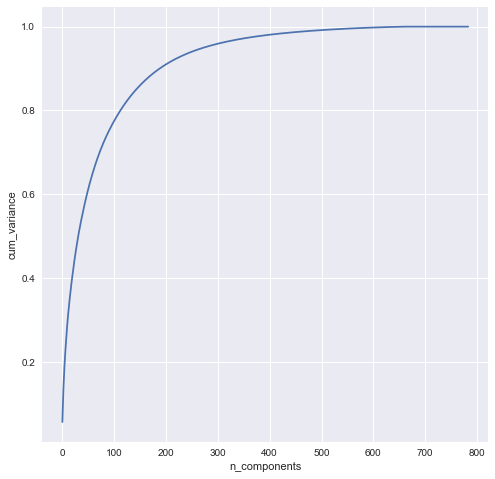

In [39]:
# plot showing variance changing as n_components/features increasing
plt.style.use('seaborn')
plt.figure(figsize=(8,8))
plt.plot(cum_var)
plt.xlabel('n_components')
plt.ylabel('cum_variance')
plt.show()

In [48]:
# number to feature req to achive 95% of variance -> k
k=0
cs=0
for i in range(len(cum_var)):
    if cum_var[i]>=0.95:
        break 
    k=k+1 
print(k)    

273
